In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Preprocessing
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#Encoding
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 3, '<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 2, 'ISLAND': 4})

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [ ]:
#Train-Test Split
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


In [ ]:
#Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.25809717, 0.50797024, 0.25490196, ..., 0.14635751, 0.28984428,
        0.        ],
       [0.47773279, 0.4357067 , 0.62745098, ..., 0.02844927, 0.20074206,
        0.25      ],
       [0.63663968, 0.16790648, 0.47058824, ..., 0.12465055, 0.21820389,
        0.25      ],
       ...,
       [0.60020243, 0.15621679, 0.80392157, ..., 0.05936524, 0.1792458 ,
        0.        ],
       [0.23380567, 0.53453773, 0.21568627, ..., 0.17365565, 0.33020234,
        0.75      ],
       [0.19433198, 0.55154091, 1.        , ..., 0.10623253, 0.23403125,
        0.75      ]])

In [ ]:
#Model Training and Architecture
model = Sequential()
#input Layer
model.add(Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
#output layer
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
EarlyStop = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_test, y_test), callbacks=[EarlyStop], verbose=1)

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 40720338944.0000 - mae: 166146.6406 - val_loss: 11441431552.0000 - val_mae: 85450.5859
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10372758528.0000 - mae: 80890.3750 - val_loss: 8048849920.0000 - val_mae: 71438.1797
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7051429376.0000 - mae: 65024.3320 - val_loss: 6062950912.0000 - val_mae: 57793.7656
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5909882368.0000 - mae: 56364.6719 - val_loss: 5877724672.0000 - val_mae: 55887.4609
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5504722432.0000 - mae: 54482.8555 - val_loss: 5705380864.0000 - val_mae: 55601.9102
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5333447168.0000 - mae: 53444.7930 - val_loss: 5518354432.0000 - val_mae: 54596.7031
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5232645632.0000 - mae: 52628.4570 - val_loss: 5348667904.0000 - val_mae:

In [ ]:
# Model results and Predictions
y_pred = model.predict(X_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
y_pred

array([[176980.47],
       [155605.36],
       [203813.47],
       ...,
       [120818.5 ],
       [159792.6 ],
       [151615.6 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error

In [ ]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MSLE: {mean_squared_log_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

MSE: 4893004526.913918
MSLE: 0.13106437047120248
R2: 0.6421981834488273
MAE: 50743.751311255284


In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

In [ ]:
epochs

range(1, 11)

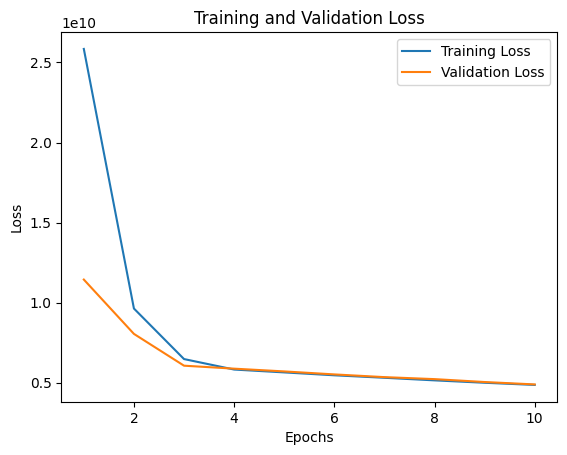

In [ ]:
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
#Predictive System:

def predict_price(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity):
  features = np.array([longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity])
  features_scaled = scaler.fit_transform(features.reshape(1, -1))
  prediction = model.predict(features_scaled)
  return prediction[0][0]

In [52]:
df.iloc[0]

,0
longitude,-122.2300
latitude,37.8800
housing_median_age,41.0000
total_rooms,880.0000
total_bedrooms,129.0000
population,322.0000
households,126.0000
median_income,8.3252
median_house_value,452600.0000
ocean_proximity,3.0000


In [53]:
longitude	= -122.2300
latitude	= 37.8800
housing_median_age	= 41.0000
total_rooms	= 880.0000
total_bedrooms	= 129.0000
population	= 322.0000
households	= 126.0000
median_income	= 8.3252
# median_house_value	= 452600.0000
ocean_proximity	= 3.0000

price = predict_price(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households,median_income, ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [54]:
price

263538.25

In [ ]:
#Saving Model
model.save('housing_model.h5')

In [ ]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [50]:
#Checking Versions of libraries and using it for websites
import sklearn
import tensorflow as tf
import keras

print('sklearn version:', sklearn.__version__)
print('tensorflow version:', tf.__version__)
print('keras version:', keras.__version__)

sklearn version: 1.6.0
tensorflow version: 2.17.1
keras version: 3.5.0
